HW2 - standard-identification-deeplearning



SubHW2-1:

(I) Dataset Visualization and Parsing

This subhomework focuses on loading and visualizing a labeled 2D dataset containing three classes.
The dataset is stored in a `.txt` file where each line represents a data point defined by two numerical features (`x1`, `x2`) and a class label (`1`, `2`, or `3`), separated by commas.

The first part of the code uses **pandas** to load the dataset into a DataFrame and generates a 2D scatter plot using **matplotlib** to visualize the class distributions in the feature space.

The second part reads the same `.txt` file manually, line by line, using basic Python file operations.
It parses each data point and stores the values into separate lists: `x1_values`, `x2_values`, and `class_labels`.

These lists will serve as input for the following subhomeworks, which involve custom implementations of density estimation and classification methods.


Loaded HW2 Dataset:
          x1       x2  class
0    0.53767  0.84038      1
1    1.83390 -0.88803      1
2   -2.25880  0.10009      1
3    0.86217 -0.54453      1
4    0.31877  0.30352      1
..       ...      ...    ...
295  2.39140 -2.11600      3
296  2.26290 -2.81970      3
297  1.25010 -2.44910      3
298  3.91050 -2.31700      3
299  3.86710 -1.82940      3

[300 rows x 3 columns]
(300, 3)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   class   300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB
None


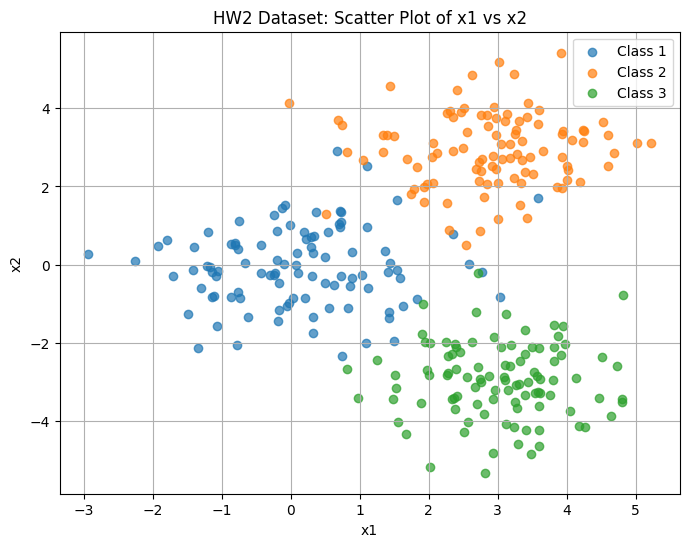

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from .txt file (no header)
file_path = "hw2_full_dataset.txt"
data = pd.read_csv(file_path, header=None, names=['x1', 'x2', 'class'])

# Display the dataset
print("Loaded HW2 Dataset:")
print(data)

print(data.shape)

# Optional: print dataset summary
print("\nDataset Info:")
print(data.info())

# Create scatter plot
plt.figure(figsize=(8, 6))

for label in sorted(data['class'].unique()):
    class_data = data[data['class'] == label]
    plt.scatter(class_data['x1'], class_data['x2'], label=f'Class {label}', alpha=0.7)

plt.title("HW2 Dataset: Scatter Plot of x1 vs x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

# Empty lists to store the data
x1_values = []
x2_values = []
class_labels = []

# Read raw data line-by-line
with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split(',')

        # Parse values
        x1 = float(values[0])
        x2 = float(values[1])
        label = int(values[2])

        # Append to lists
        x1_values.append(x1)
        x2_values.append(x2)
        class_labels.append(label)


SubHW2-1:

(II) Parzen Window Density Estimation

-->Part1

In this task, we implement a non-parametric method to estimate class-conditional probability densities using the Parzen Window approach.

Each data point is described by two features (x1, x2) and belongs to one of three classes (ω1, ω2, ω3). The goal is to estimate the probability densities p(x|ω1), p(x|ω2), and p(x|ω3) over the feature space using kernel density estimation.

Key steps:
-----------
- We define a function `parzen_window(x, xi, h)` that computes the contribution of each kernel centered at a point xi to a query point x. A Gaussian kernel is used.
- A bandwidth parameter `h` controls the smoothness of the estimate.
- For each data point `x`, we loop over all other points `xi` in the dataset:
    - If xi belongs to class 1, its contribution is added to `p_w1`
    - If it belongs to class 2, it is added to `p_w2`
    - If it belongs to class 3, it contributes to `p_w3`

Finally, we plot the estimated densities for each class in 3D, with x1 and x2 on the horizontal axes and the estimated probability density along the Z axis.

This method allows flexible estimation without making strong assumptions about the data distribution and is useful in situations where the underlying class distributions are unknown or multimodal.

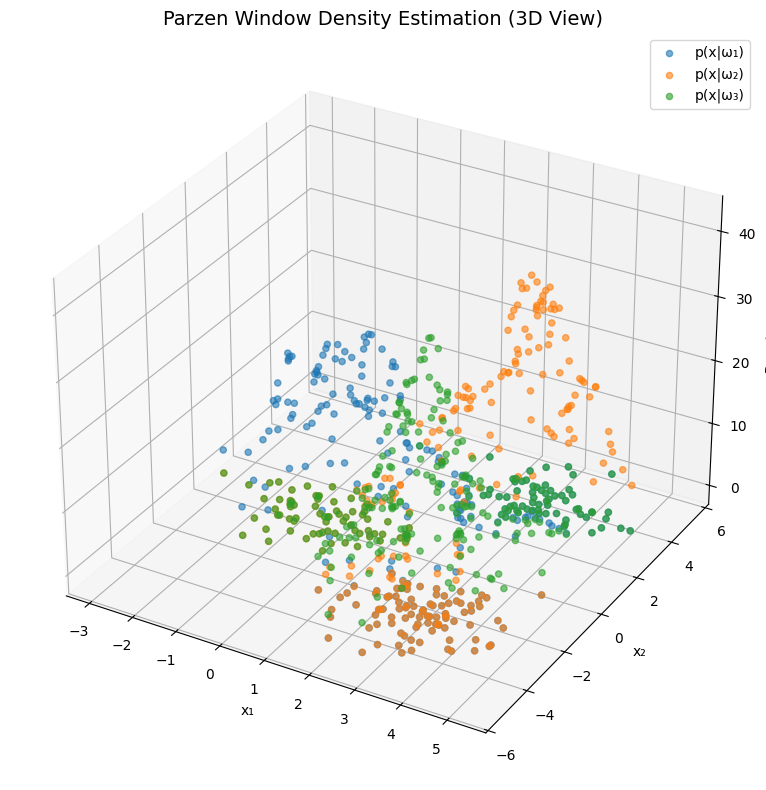

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --------------------------------------------------
# Function: Parzen Window Kernel (Gaussian Function)
# --------------------------------------------------
def parzen_window(x, xi, h):
    """
    Computes the Parzen window estimate using a Gaussian kernel.

    Parameters:
    - x: point at which density is estimated
    - xi: center of kernel (training point)
    - h: bandwidth (window size)

    Returns:
    - estimated kernel value at point x
    """
    squared_distance = np.sum((x - xi) ** 2)
    return (1 / (np.pi * h**2)) * np.exp(-squared_distance / (2 * h**2))

# ------------------------------
# Bandwidth Parameter (h)
# ------------------------------
h = 0.3  # Changeable: try 0.1, 0.7 for different smoothing

# ------------------------------
# Initialize Class Density Arrays
# ------------------------------
p_w1 = np.zeros(len(x1_values))
p_w2 = np.zeros(len(x2_values))
p_w3 = np.zeros(len(x1_values))

# ------------------------------
# Estimate Class-Conditional Densities
# ------------------------------
for i in range(len(x1_values)):
    sample_point = np.array([x1_values[i], x2_values[i]])

    for j in range(len(x1_values)):
        center_point = np.array([x1_values[j], x2_values[j]])
        class_label = class_labels[j]

        if class_label == 1:
            p_w1[i] += parzen_window(sample_point, center_point, h)
        elif class_label == 2:
            p_w2[i] += parzen_window(sample_point, center_point, h)
        elif class_label == 3:
            p_w3[i] += parzen_window(sample_point, center_point, h)

# ------------------------------
# 3D Visualization of Density Estimates
# ------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1_values, x2_values, p_w1, label='p(x|ω₁)', alpha=0.6)
ax.scatter(x1_values, x2_values, p_w2, label='p(x|ω₂)', alpha=0.6)
ax.scatter(x1_values, x2_values, p_w3, label='p(x|ω₃)', alpha=0.6)

ax.set_title('Parzen Window Density Estimation (3D View)', fontsize=14)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('Density')
ax.legend()
plt.tight_layout()
plt.show()


SubHW2-1:

(II) Parzen Window Density Estimation

-->Part2

This script visualizes the **Parzen Window density estimation** for class **ω₁** using a 3D surface plot.

It estimates probability densities on a 2D grid using a **Gaussian kernel**.

Multiple bandwidth values (`h = 0.1, 0.3, 0.7`) are tested to illustrate how the shape of the estimated density changes.

The result is a set of **3D surface plots**, one for each `h`, highlighting how **narrow kernels produce sharp estimates** and **wide kernels result in smoother distributions**.

This visualization helps us better understand how **kernel width (bandwidth)** influences the Parzen method.


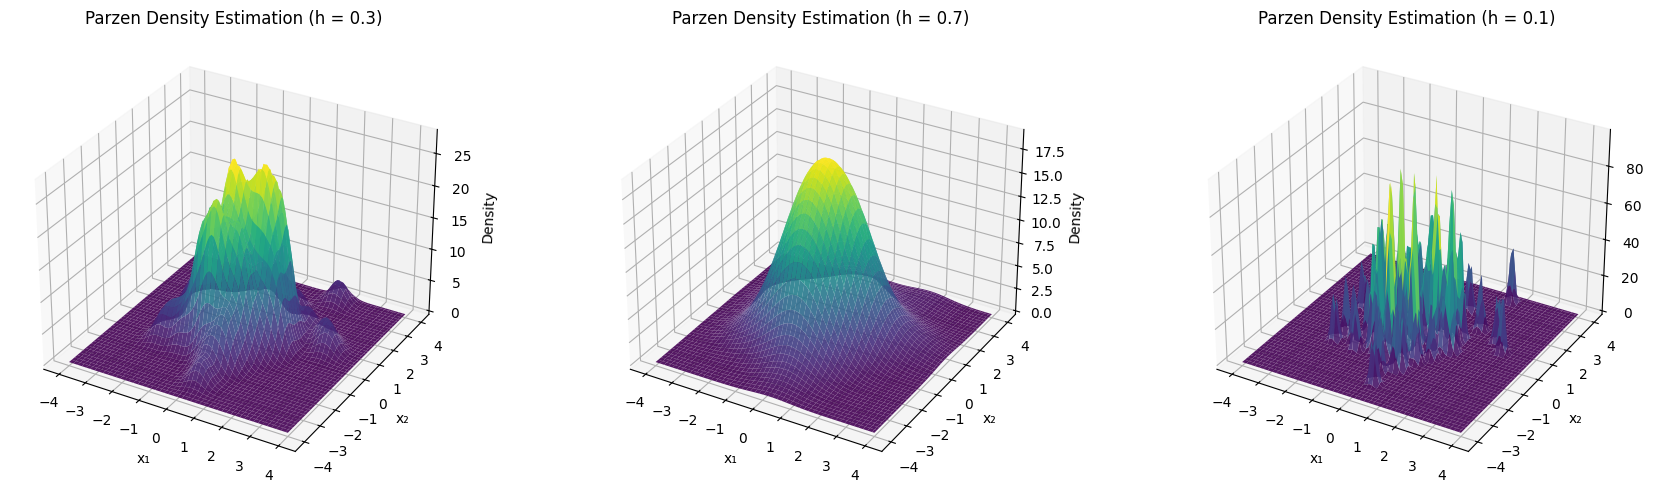

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --------------------------------------------------
# Function: Gaussian Kernel for Parzen Window
# --------------------------------------------------
def parzen_window(x, xi, h):
    """
    Gaussian kernel for Parzen window density estimation.

    Parameters:
    - x: target point
    - xi: center point
    - h: bandwidth

    Returns:
    - density contribution from xi to x
    """
    squared_distance = np.sum((x - xi) ** 2)
    return (1 / (np.pi * h**2)) * np.exp(-squared_distance / (2 * h**2))


# --------------------------------------------------
# Define Bandwidths and Grid Range
# --------------------------------------------------
h_values = [0.3, 0.7, 0.1]                 # Different bandwidths to test
x_range = np.linspace(-4, 4, 100)          # Grid range for both x1 and x2

# Create 3D plots for each h
fig = plt.figure(figsize=(18, 5))

for idx, h in enumerate(h_values):
    # Initialize density grid
    p_w = np.zeros((len(x_range), len(x_range)))

    # Loop over grid points
    for i, x1 in enumerate(x_range):
        for j, x2 in enumerate(x_range):
            x = np.array([x1, x2])
            for k in range(len(x1_values)):
                xi = np.array([x1_values[k], x2_values[k]])
                if class_labels[k] == 1:  # Only for class ω1
                    p_w[i, j] += parzen_window(x, xi, h)

    # Create meshgrid for surface plot
    X, Y = np.meshgrid(x_range, x_range)

    # 3D Surface Plot
    ax = fig.add_subplot(1, len(h_values), idx + 1, projection='3d')
    ax.plot_surface(X, Y, p_w, cmap='viridis', edgecolor='none', alpha=0.9)
    ax.set_title(f'Parzen Density Estimation (h = {h})', fontsize=12)
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_zlabel('Density')

plt.tight_layout()
plt.show()


SubHW2-1:

(III)k-NN Density Estimation

-->Part1

This code estimates the **probability density** of each data point using the **k-nearest neighbors (k-NN)** method.

A custom function `knn_density_estimation` calculates the density based on the **volume around the k closest neighbors**.

The density is estimated **separately for each class** (ω₁, ω₂, ω₃) using the known class labels.

The results are visualized using a **3D scatter plot**, where density is plotted along the z-axis, and features x₁, x₂ along the x and y axes.

This method is a form of **non-parametric density estimation** and helps visualize how densely packed regions are, depending on class and spatial distribution.


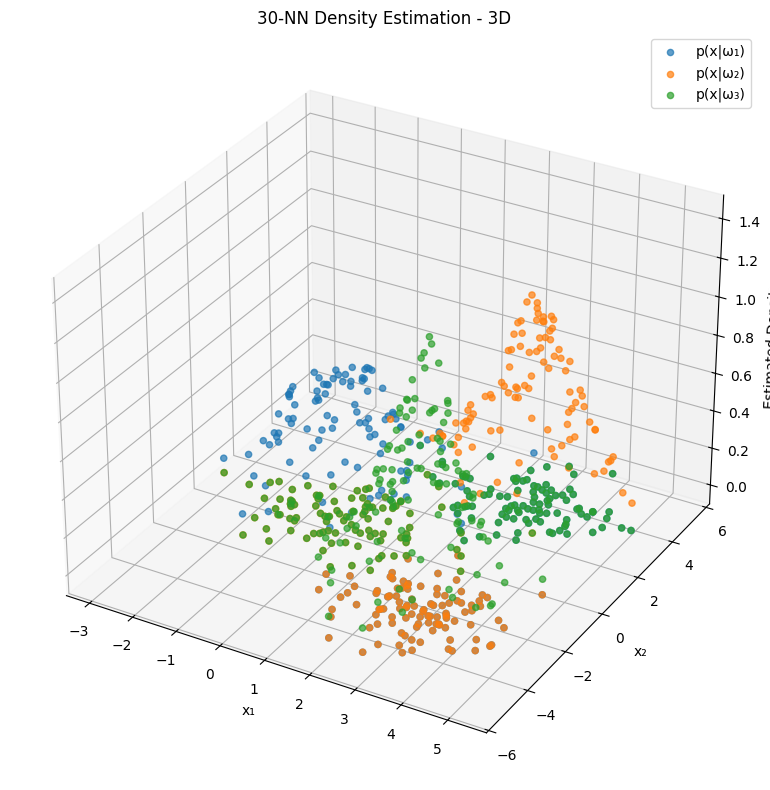

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------------------------------
# Function: k-Nearest Neighbors Density Estimation (2D)
# -------------------------------------------------------
def knn_density_estimation(x, data, k):
    """
    Estimate the density at point x using k-nearest neighbors.

    Parameters:
        x    : array-like, shape (1, 2), query point
        data : array-like, shape (n_samples, 2), dataset
        k    : int, number of neighbors

    Returns:
        density : float, estimated density at point x
    """
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(x)

    volumes = np.pi * distances**2  # Area of 2D balls (circles)
    density = k / np.sum(volumes)

    return density

# ---------------------------
# Parameters and Preparation
# ---------------------------
k = 30  # Number of neighbors
data_points = np.column_stack((x1_values, x2_values))

# Initialize density arrays
p_w1 = np.zeros(len(data_points))
p_w2 = np.zeros(len(data_points))
p_w3 = np.zeros(len(data_points))

# ---------------------------
# Density Estimation Loop
# ---------------------------
for i, sample in enumerate(data_points):
    density = knn_density_estimation(sample.reshape(1, -1), data_points, k)

    label = class_labels[i]
    if label == 1:
        p_w1[i] = density
    elif label == 2:
        p_w2[i] = density
    elif label == 3:
        p_w3[i] = density

# ---------------------------
# 3D Visualization
# ---------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1_values, x2_values, p_w1, label='p(x|ω₁)', alpha=0.7)
ax.scatter(x1_values, x2_values, p_w2, label='p(x|ω₂)', alpha=0.7)
ax.scatter(x1_values, x2_values, p_w3, label='p(x|ω₃)', alpha=0.7)

ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('Estimated Density')
ax.set_title(f'{k}-NN Density Estimation - 3D')
ax.legend()
plt.tight_layout()
plt.show()


SubHW2-1:

(III)k-NN Density Estimation

-->Part2

This part visualizes the **estimated probability density function** using **k-Nearest Neighbors (k-NN)** over a **2D grid**, similar to the Parzen Windows approach.

A range of values (`x_range`) is defined to span the 2D feature space.

For each chosen value of **k** (e.g., 3, 10, 30), the script calculates a full **density grid** over the entire space.

At each grid point (x₁, x₂), the **average k-NN density** is computed using the `knn_density_estimation` function.

Finally, the density surfaces for each **k value** are plotted as separate 3D surface plots using `matplotlib`.




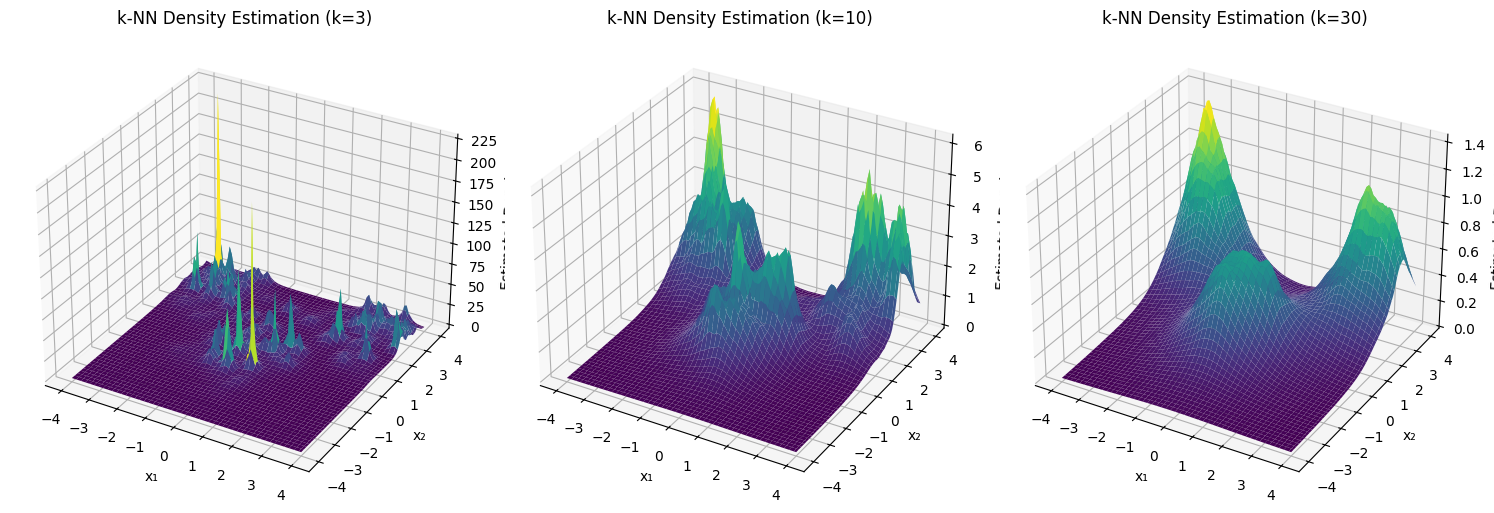

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------------
# Parameters
# --------------------------------------------------------
x_range = np.linspace(-4, 4, 100)  # Grid range for both x1 and x2
k_values = [3, 10, 30]             # Different k values to visualize
data_points = np.column_stack((x1_values, x2_values))  # Full dataset

fig = plt.figure(figsize=(15, 5))

# --------------------------------------------------------
# Loop over different k values for density estimation
# --------------------------------------------------------
for idx, k in enumerate(k_values):
    p_w = np.zeros((len(x_range), len(x_range)))  # Initialize 2D grid for densities

    for i, x1 in enumerate(x_range):
        for j, x2 in enumerate(x_range):
            point = np.array([[x1, x2]])  # Query point (1, 2)
            density = knn_density_estimation(point, data_points, k)
            p_w[i, j] = density

    # Plot surface for this value of k
    ax = fig.add_subplot(1, len(k_values), idx + 1, projection='3d')
    X, Y = np.meshgrid(x_range, x_range)
    ax.plot_surface(X, Y, p_w, cmap='viridis')
    ax.set_title(f'k-NN Density Estimation (k={k})')
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_zlabel('Estimated Density')

plt.tight_layout()
plt.show()


SubHW2-1:

(IV)Naive Bayes + Parzen Contours

This sub-part visualizes the **Bayesian decision boundaries** learned using a **Naive Bayes classifier**, along with **Parzen window contour lines** for different bandwidths (h).

The data points (x₁, x₂, label) are first used to train a `GaussianNB` model.

A 2D grid covering the feature space is generated using `np.meshgrid`, and predictions are computed at each grid point to define the **Bayes decision regions**.

In parallel, for each bandwidth value h, the **Parzen window density estimation** is calculated at all grid points for class ω₁. These densities are plotted as **contour lines**.

🖼️ The final figure consists of **3 subplots**:
- Each subplot shows the **Bayesian decision regions** (colored background) and **Parzen contours** for a different h.
- This helps compare **parametric** (Bayes) vs **non-parametric** (Parzen) methods visually.


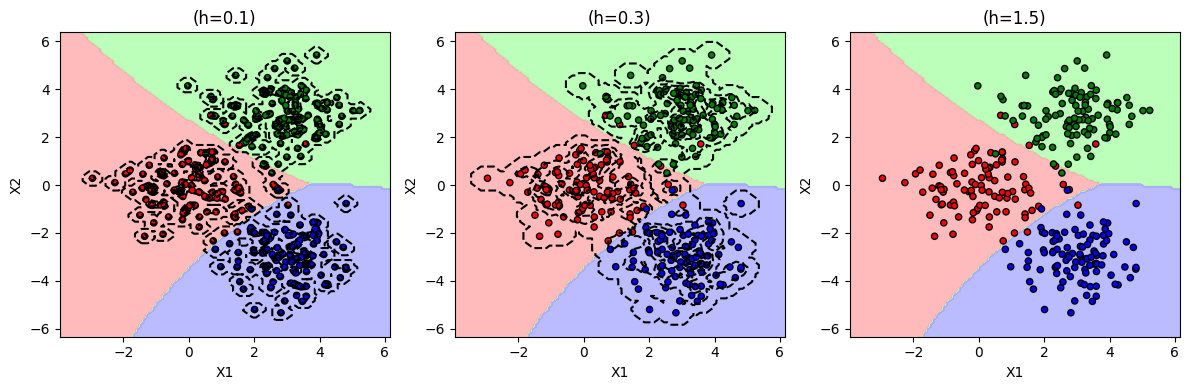

In [22]:
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

# Bayes classifier
clf = GaussianNB()
X = np.column_stack((x1_values, x2_values))
clf.fit(X, class_labels)

# meshgrid for decision boundary plotting
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.figure(figsize=(12, 4))

# Plot
for i, h in enumerate([0.1, 0.3, 1.5]):
    p_w = np.zeros_like(Z)
    for k, x in enumerate(np.c_[xx.ravel(), yy.ravel()]):
        for l in range(len(x1_values)):
            xi = np.array([x1_values[l], x2_values[l]])
            p_w[k // Z.shape[1], k % Z.shape[1]] += parzen_window(x, xi, h)

    plt.subplot(1, 3, i + 1)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(x1_values, x2_values, c=class_labels, cmap=ListedColormap(['red', 'green', 'blue']), edgecolor='k', s=20)
    plt.contour(xx, yy, p_w, levels=5, colors='black', linestyles='dashed')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'(h={h})')
    plt.tight_layout()

plt.show()
